In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Coffe_sales.csv")

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

year = 2024

if "Date" in df.columns:
    df_year = df[df["Date"].dt.year == year].copy()
    if df_year.empty:
        print(f"No records for {year}, using all data instead.")
        df_year = df.copy()
else:
    df_year = df.copy()

In [4]:
coffee_counts = df_year["coffee_name"].value_counts()

pd.DataFrame({
    "Coffee Type": coffee_counts.index,
    "Count": coffee_counts.values,
    "Percentage": (coffee_counts / coffee_counts.sum() * 100).round(1)
})

,Coffee Type,Count,Percentage
coffee_name,,,
Americano with Milk,Americano with Milk,620,23.8
Latte,Latte,605,23.2
Cappuccino,Cappuccino,364,14.0
Americano,Americano,320,12.3
Cortado,Cortado,253,9.7
Hot Chocolate,Hot Chocolate,206,7.9
Cocoa,Cocoa,139,5.3
Espresso,Espresso,97,3.7


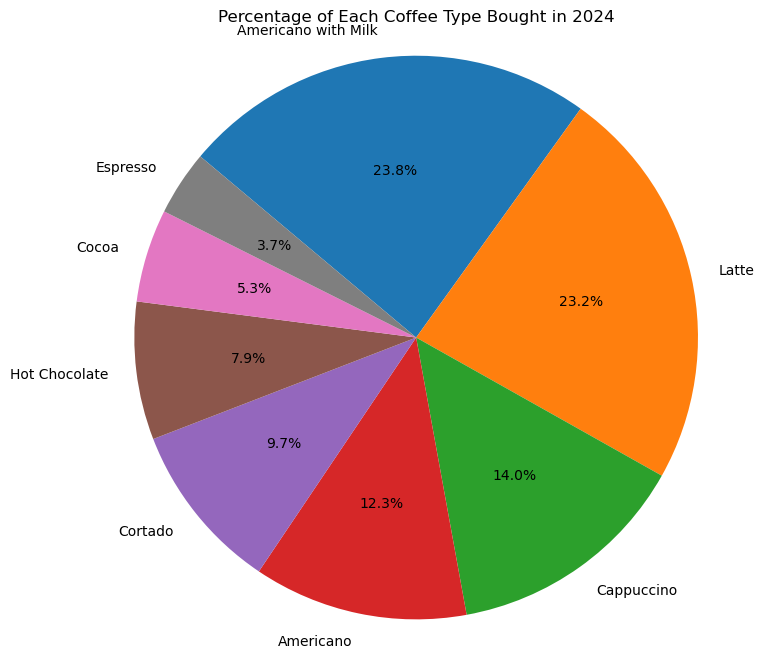

In [5]:
plt.figure(figsize=(8, 8))
plt.pie(
    coffee_counts,
    labels=coffee_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title(f"Percentage of Each Coffee Type Bought in {year if 'Date' in df.columns else 'the Dataset'}")
plt.axis('equal')  
plt.show()

In [6]:
import plotly.express as px

# --- Filter to a year (same logic you already have) ---
year = 2024

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

    df_year = df[df["Date"].dt.year == year].copy()
    if df_year.empty:
        print(f"No records for {year}, using all data instead.")
        df_year = df.copy()
        title_year = "all years"
    else:
        title_year = str(year)
else:
    df_year = df.copy()
    title_year = "the dataset"

# --- Aggregate counts + percentages ---
coffee_counts = (
    df_year["coffee_name"]
    .value_counts()
    .rename_axis("Coffee Type")
    .reset_index(name="Count")
)

coffee_counts["Percentage"] = (
    coffee_counts["Count"] / coffee_counts["Count"].sum() * 100
).round(1)

# --- Interactive Plotly pie chart ---
fig = px.pie(
    coffee_counts,
    names="Coffee Type",
    values="Count",
    hover_data={"Percentage": True},  # show Percentage in tooltip
    title=f"Percentage of Each Coffee Type Bought in {title_year}",
)

# Show labels + percent on the chart itself
fig.update_traces(textinfo="label+percent", textposition="inside")

fig.show()

In [7]:
import plotly.io as pio

# Save just the interactive chart as its own HTML file
pio.write_html(
    fig,
    file="coffee_pie.html",   # you can change the filename
    full_html=True,
    include_plotlyjs="cdn"    # or "directory" / "inline" if you prefer offline
)